<a href="https://colab.research.google.com/github/Truth300/E-Commerce-Data-Analysis/blob/main/E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction:
In the world of e-commerce, data is a powerful asset that can be leveraged to understand customer behavior, improve sales strategies, and enhance overall business performance.

Dataset Overview:
The dummy dataset contains information on 1000 products across different categories such as electronics, clothing, home & kitchen, books, toys & games, and more. Each product is associated with attributes such as price, rating, number of reviews, stock quantity, discounts, sales, and date added to inventory. This comprehensive dataset provides a rich source of information for analysis and exploration.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/drive/MyDrive/ecommerce_product_dataset.csv')
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08


In [5]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductID      1000 non-null   int64  
 1   ProductName    1000 non-null   object 
 2   Category       1000 non-null   object 
 3   Price          1000 non-null   float64
 4   Rating         1000 non-null   float64
 5   NumReviews     1000 non-null   int64  
 6   StockQuantity  1000 non-null   int64  
 7   Discount       1000 non-null   float64
 8   Sales          1000 non-null   int64  
 9   DateAdded      1000 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 78.2+ KB


,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded
count,1000.000000,1000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,100,25,NaN,NaN,NaN,NaN,NaN,NaN,346
top,NaN,Biography,Electronics,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-09
freq,NaN,22,40,NaN,NaN,NaN,NaN,NaN,NaN,7
mean,500.500000,NaN,NaN,253.77551,3.025600,2498.753000,495.395000,0.251640,1011.037000,NaN
std,288.819436,NaN,NaN,141.40362,1.151004,1463.241871,292.799253,0.146455,582.113466,NaN
min,1.000000,NaN,NaN,10.11000,1.000000,3.000000,0.000000,0.000000,0.000000,NaN
25%,250.750000,NaN,NaN,133.09250,2.100000,1201.750000,241.750000,0.130000,502.000000,NaN
50%,500.500000,NaN,NaN,251.31000,3.100000,2476.000000,505.000000,0.250000,998.000000,NaN
75%,750.250000,NaN,NaN,375.82750,4.000000,3797.500000,743.500000,0.380000,1540.000000,NaN


<Axes: >

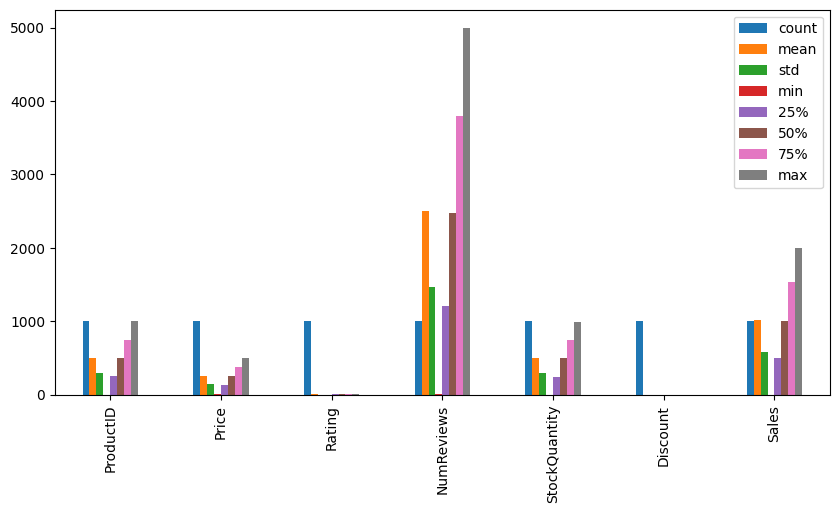

In [6]:
df.describe().T.plot(kind='bar',figsize=(10,5))

In [7]:
df.isna().sum()

ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
dtype: int64

In [8]:
df['Category'].value_counts()

Category
Electronics                   40
Wine                          40
Mobile phone accessories      40
Motor vehicle parts           40
Underwear                     40
Nail care                     40
Cookware                      40
Bath and body                 40
Candles                       40
Posters and artwork           40
Bedsheets                     40
Socks                         40
Perfume and cologne           40
Clothing                      40
Drinkware                     40
Art and crafting materials    40
Bicycles                      40
Coats and jackets             40
Makeup                        40
Skin care                     40
Vitamins and supplements      40
Toys & Games                  40
Books                         40
Home & Kitchen                40
Blankets                      40
Name: count, dtype: int64

In [9]:
df.rename({'Mobile phone accessories':'Mobile Accessories','Motor vehicle parts':'Vehicle parts','Art and crafting materials':'Art materials','Vitamins and supplements':'Vitamins'}, axis=1, inplace=True)

In [10]:
df.drop(columns={'ProductID','StockQuantity','Discount','Rating'}, inplace=True)
df.head(2)

,ProductName,Category,Price,NumReviews,Sales,DateAdded
0,Headphones,Electronics,400.31,3772,466,2023-11-08
1,Headphones,Electronics,235.03,2919,1332,2023-09-26


<ipython-input-11-e7117e0082d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='ProductName', data=df, order=df['ProductName'].value_counts().index[:10], palette='plasma')


Text(0.5, 1.0, 'Top 10 Product Names')

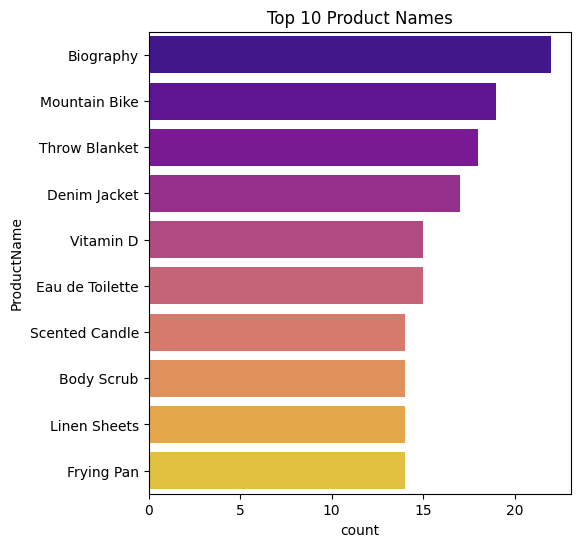

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(y='ProductName', data=df, order=df['ProductName'].value_counts().index[:10], palette='plasma')
plt.title('Top 10 Product Names')

<ipython-input-12-f8873f78cf69>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Sales", y="Category",palette="icefire",errorbar=None, legend=True)


Text(0.5, 1.0, 'Fig.1 Barplot of the Category and its Number of Sales')

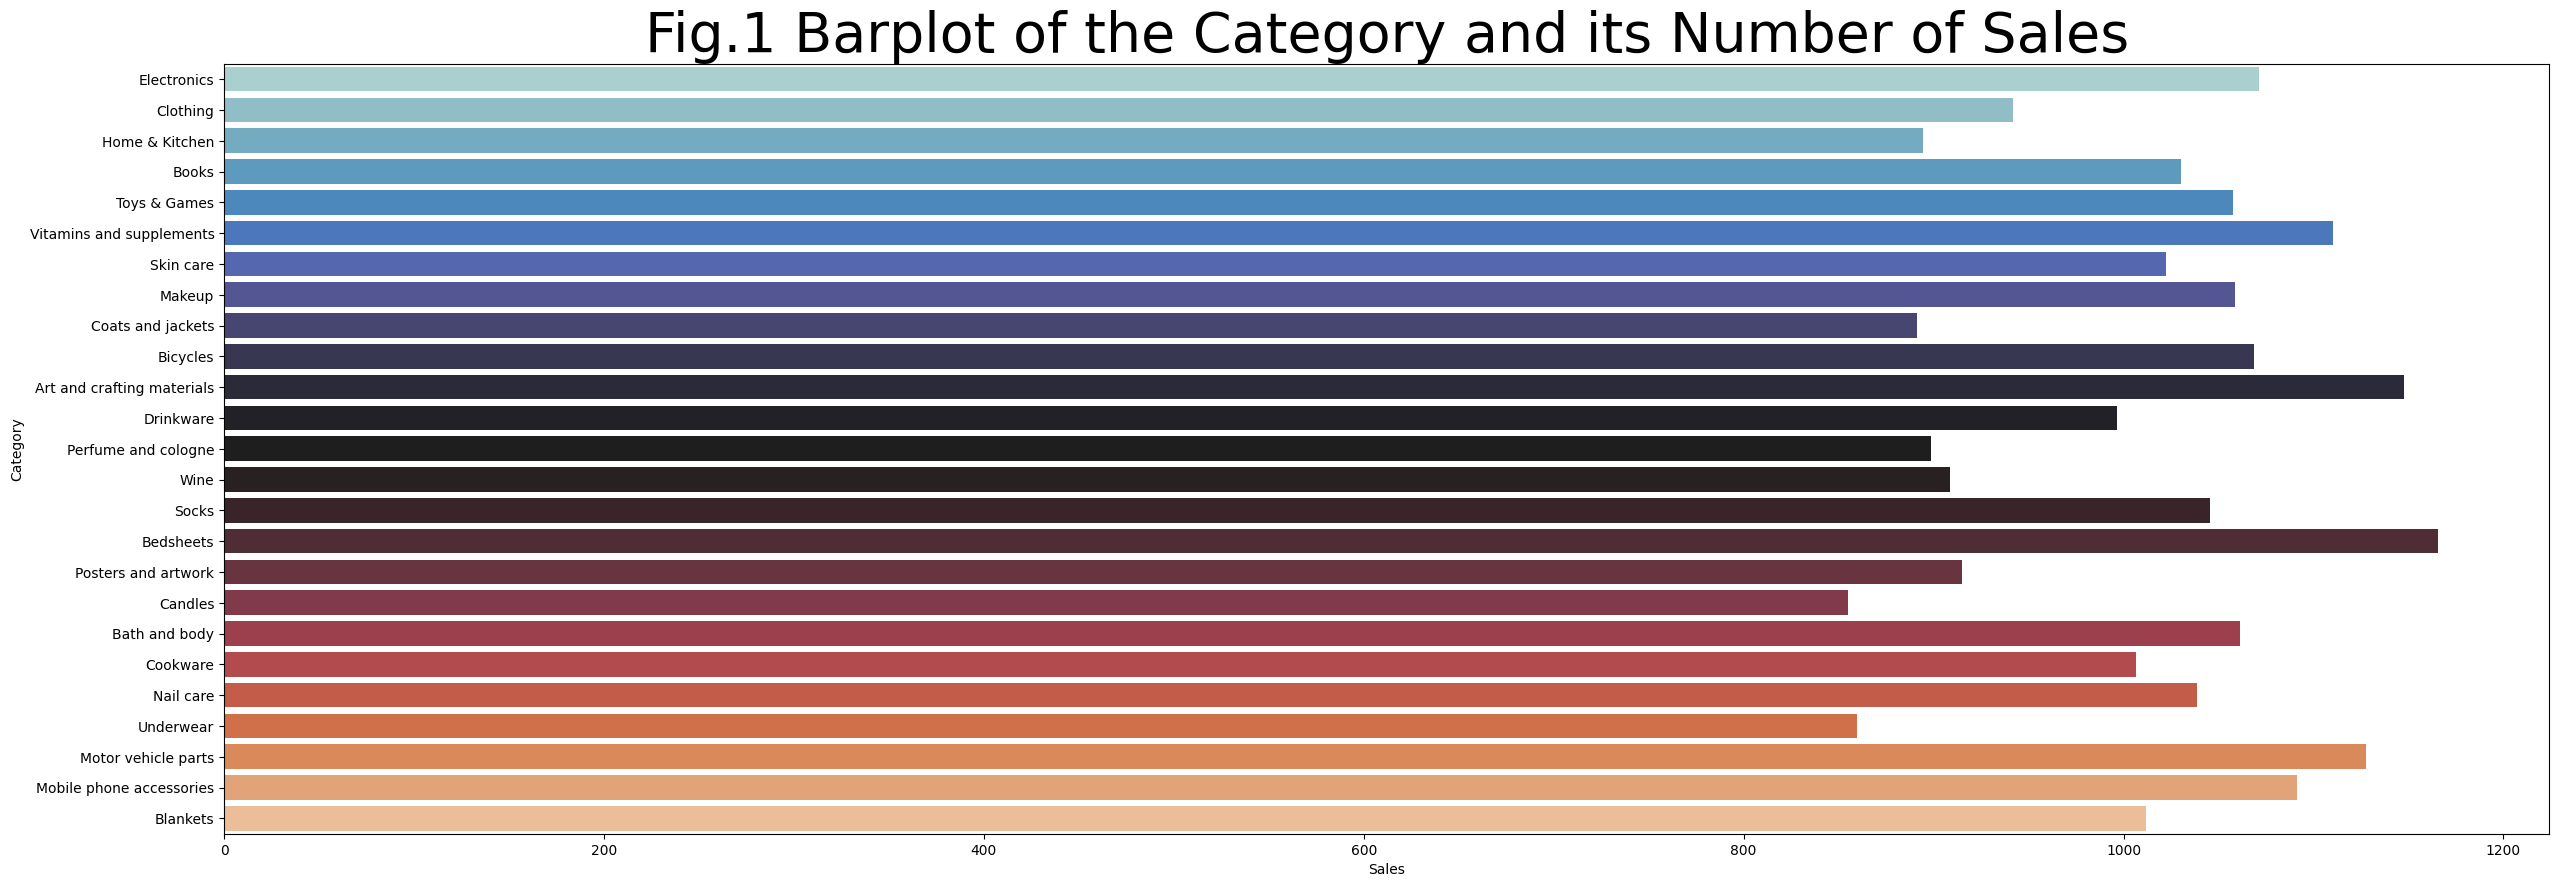

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,10))
sns.barplot(data=df, x="Sales", y="Category",palette="icefire",errorbar=None, legend=True)
plt.title('Fig.1 Barplot of the Category and its Number of Sales',fontdict={'fontsize': 40})

In [13]:
df.corr(numeric_only=True)

,Price,NumReviews,Sales
Price,1.000000,0.012782,0.029076
NumReviews,0.012782,1.000000,0.056586
Sales,0.029076,0.056586,1.000000


Text(0.5, 1.0, 'Fig.2 Correlation of the Dataset')

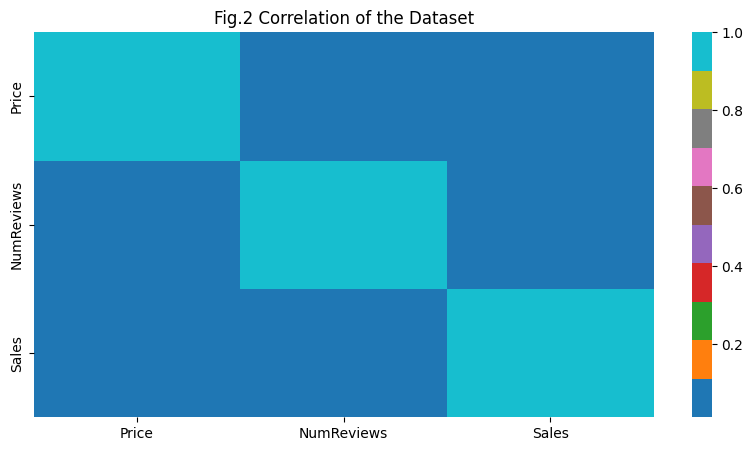

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), cmap='tab10')
plt.title('Fig.2 Correlation of the Dataset')

Text(0.5, 1.0, 'Fig.3 KDEplot of Price and Sales')

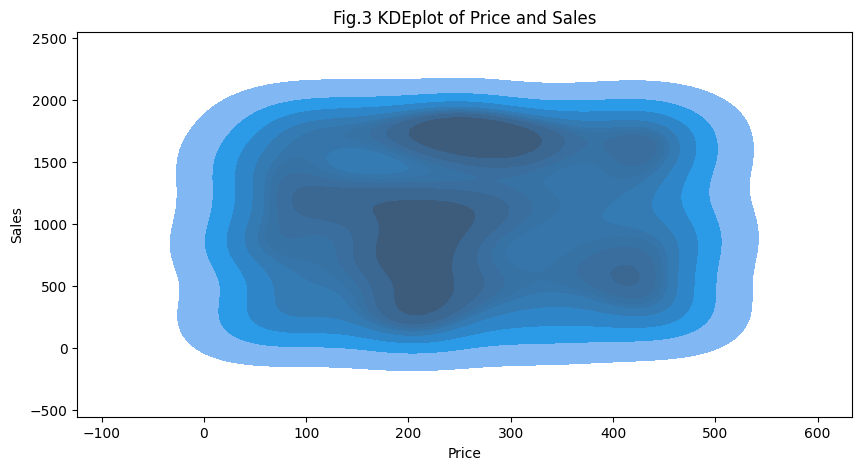

In [15]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df,x='Price',y='Sales',fill=True)
plt.title('Fig.3 KDEplot of Price and Sales')

Text(0.5, 1.0, 'Fig.4 Histogram plot of Item price')

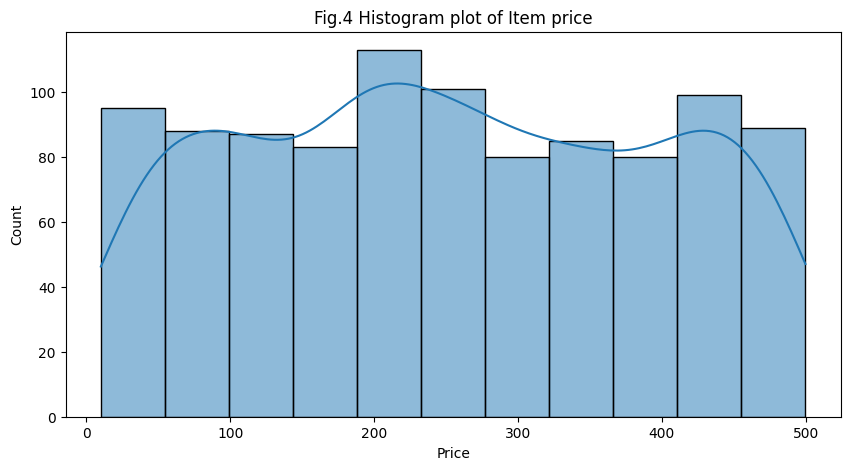

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Price",kde='reg')
plt.title('Fig.4 Histogram plot of Item price')

In [17]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('talk')

Text(0.5, 1.0, 'Fig.5 The Relation between Price and Sales')

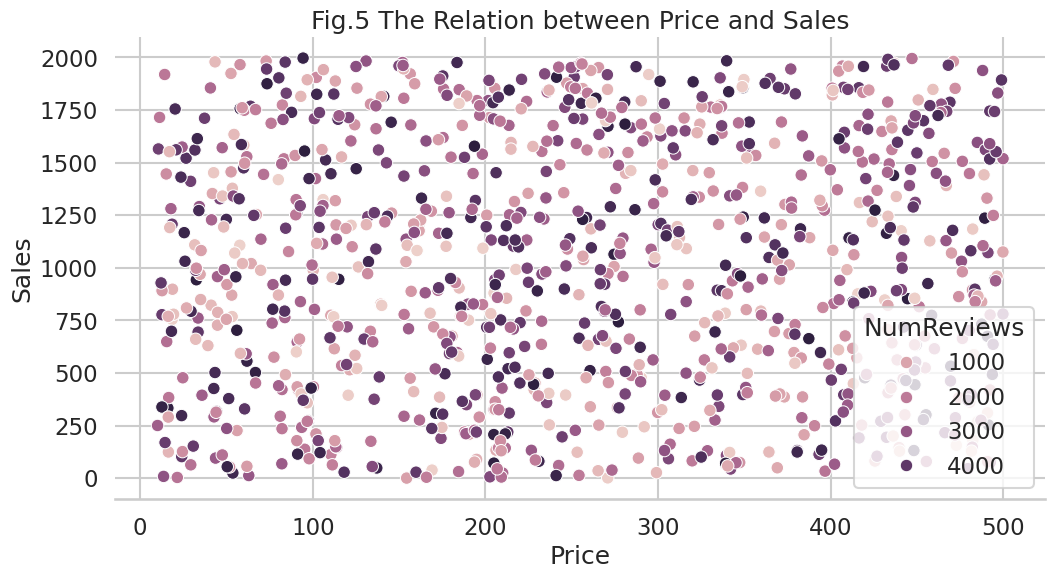

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='Price',y='Sales',hue='NumReviews')
sns.despine(left=True)
plt.title('Fig.5 The Relation between Price and Sales')

Text(0.5, 1.0, 'Fig.6 The proportion of Sales ')

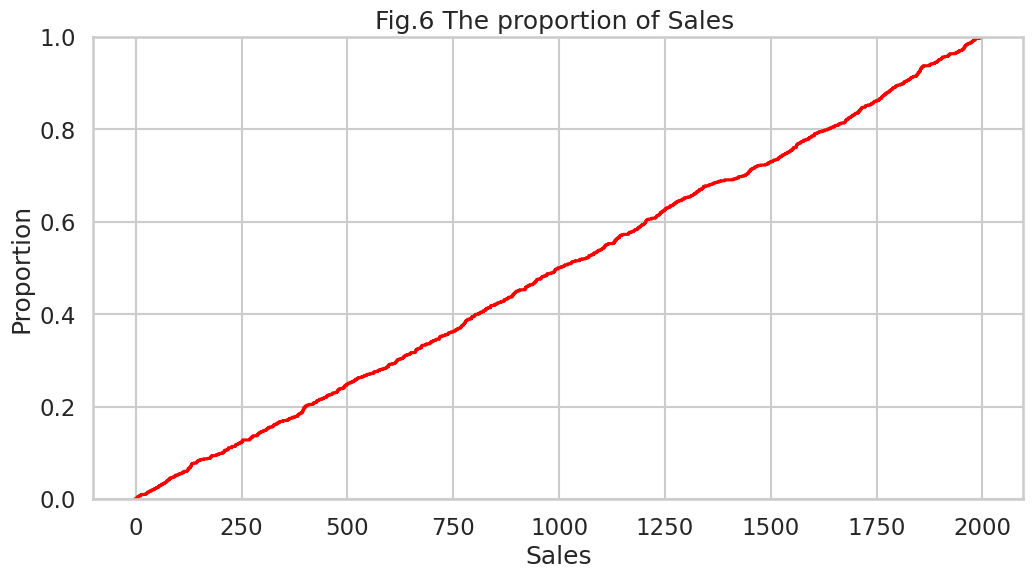

In [34]:
plt.figure(figsize=(12,6))
sns.ecdfplot(data=df,x='Sales',color='red')
plt.title('Fig.6 The proportion of Sales ')

Text(0.5, 1.0, 'Fig.7 Pointplot of Category and Sales')

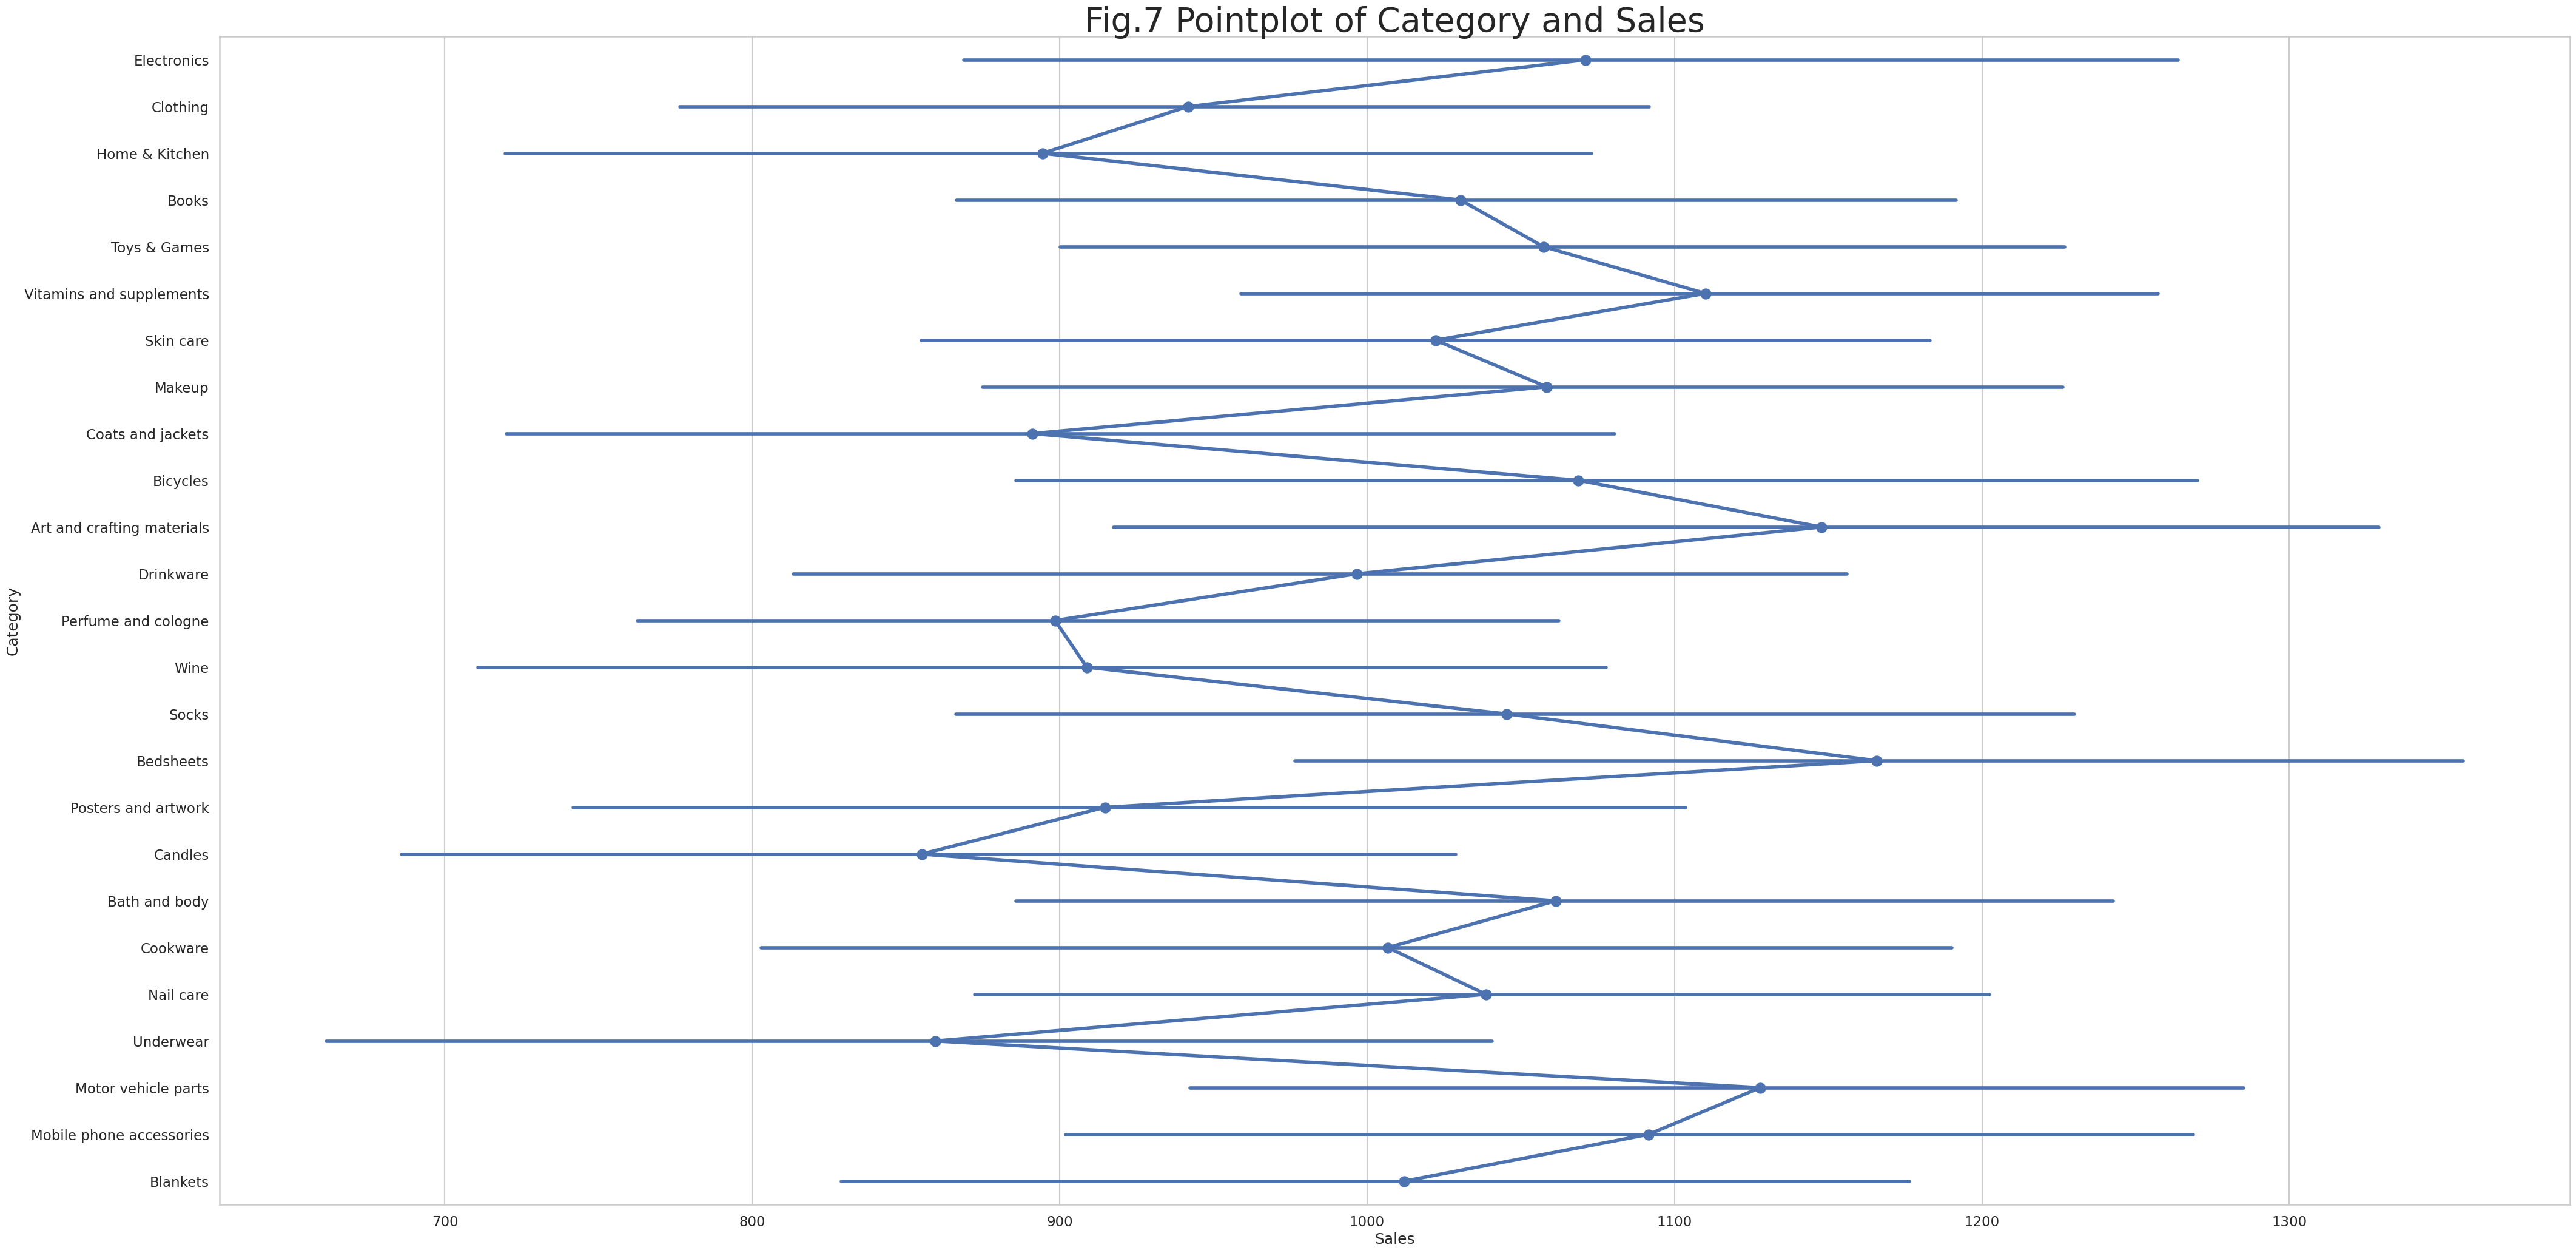

In [20]:
plt.figure(figsize=(40,20))
sns.pointplot(data=df,x='Sales',y='Category')
plt.title('Fig.7 Pointplot of Category and Sales',fontdict={'fontsize': 40})

<ipython-input-36-fbf3b33e16db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df,x='Sales',y='Category',palette='tab10')


Text(0.5, 1.0, 'Fig.8 Boxenplot')

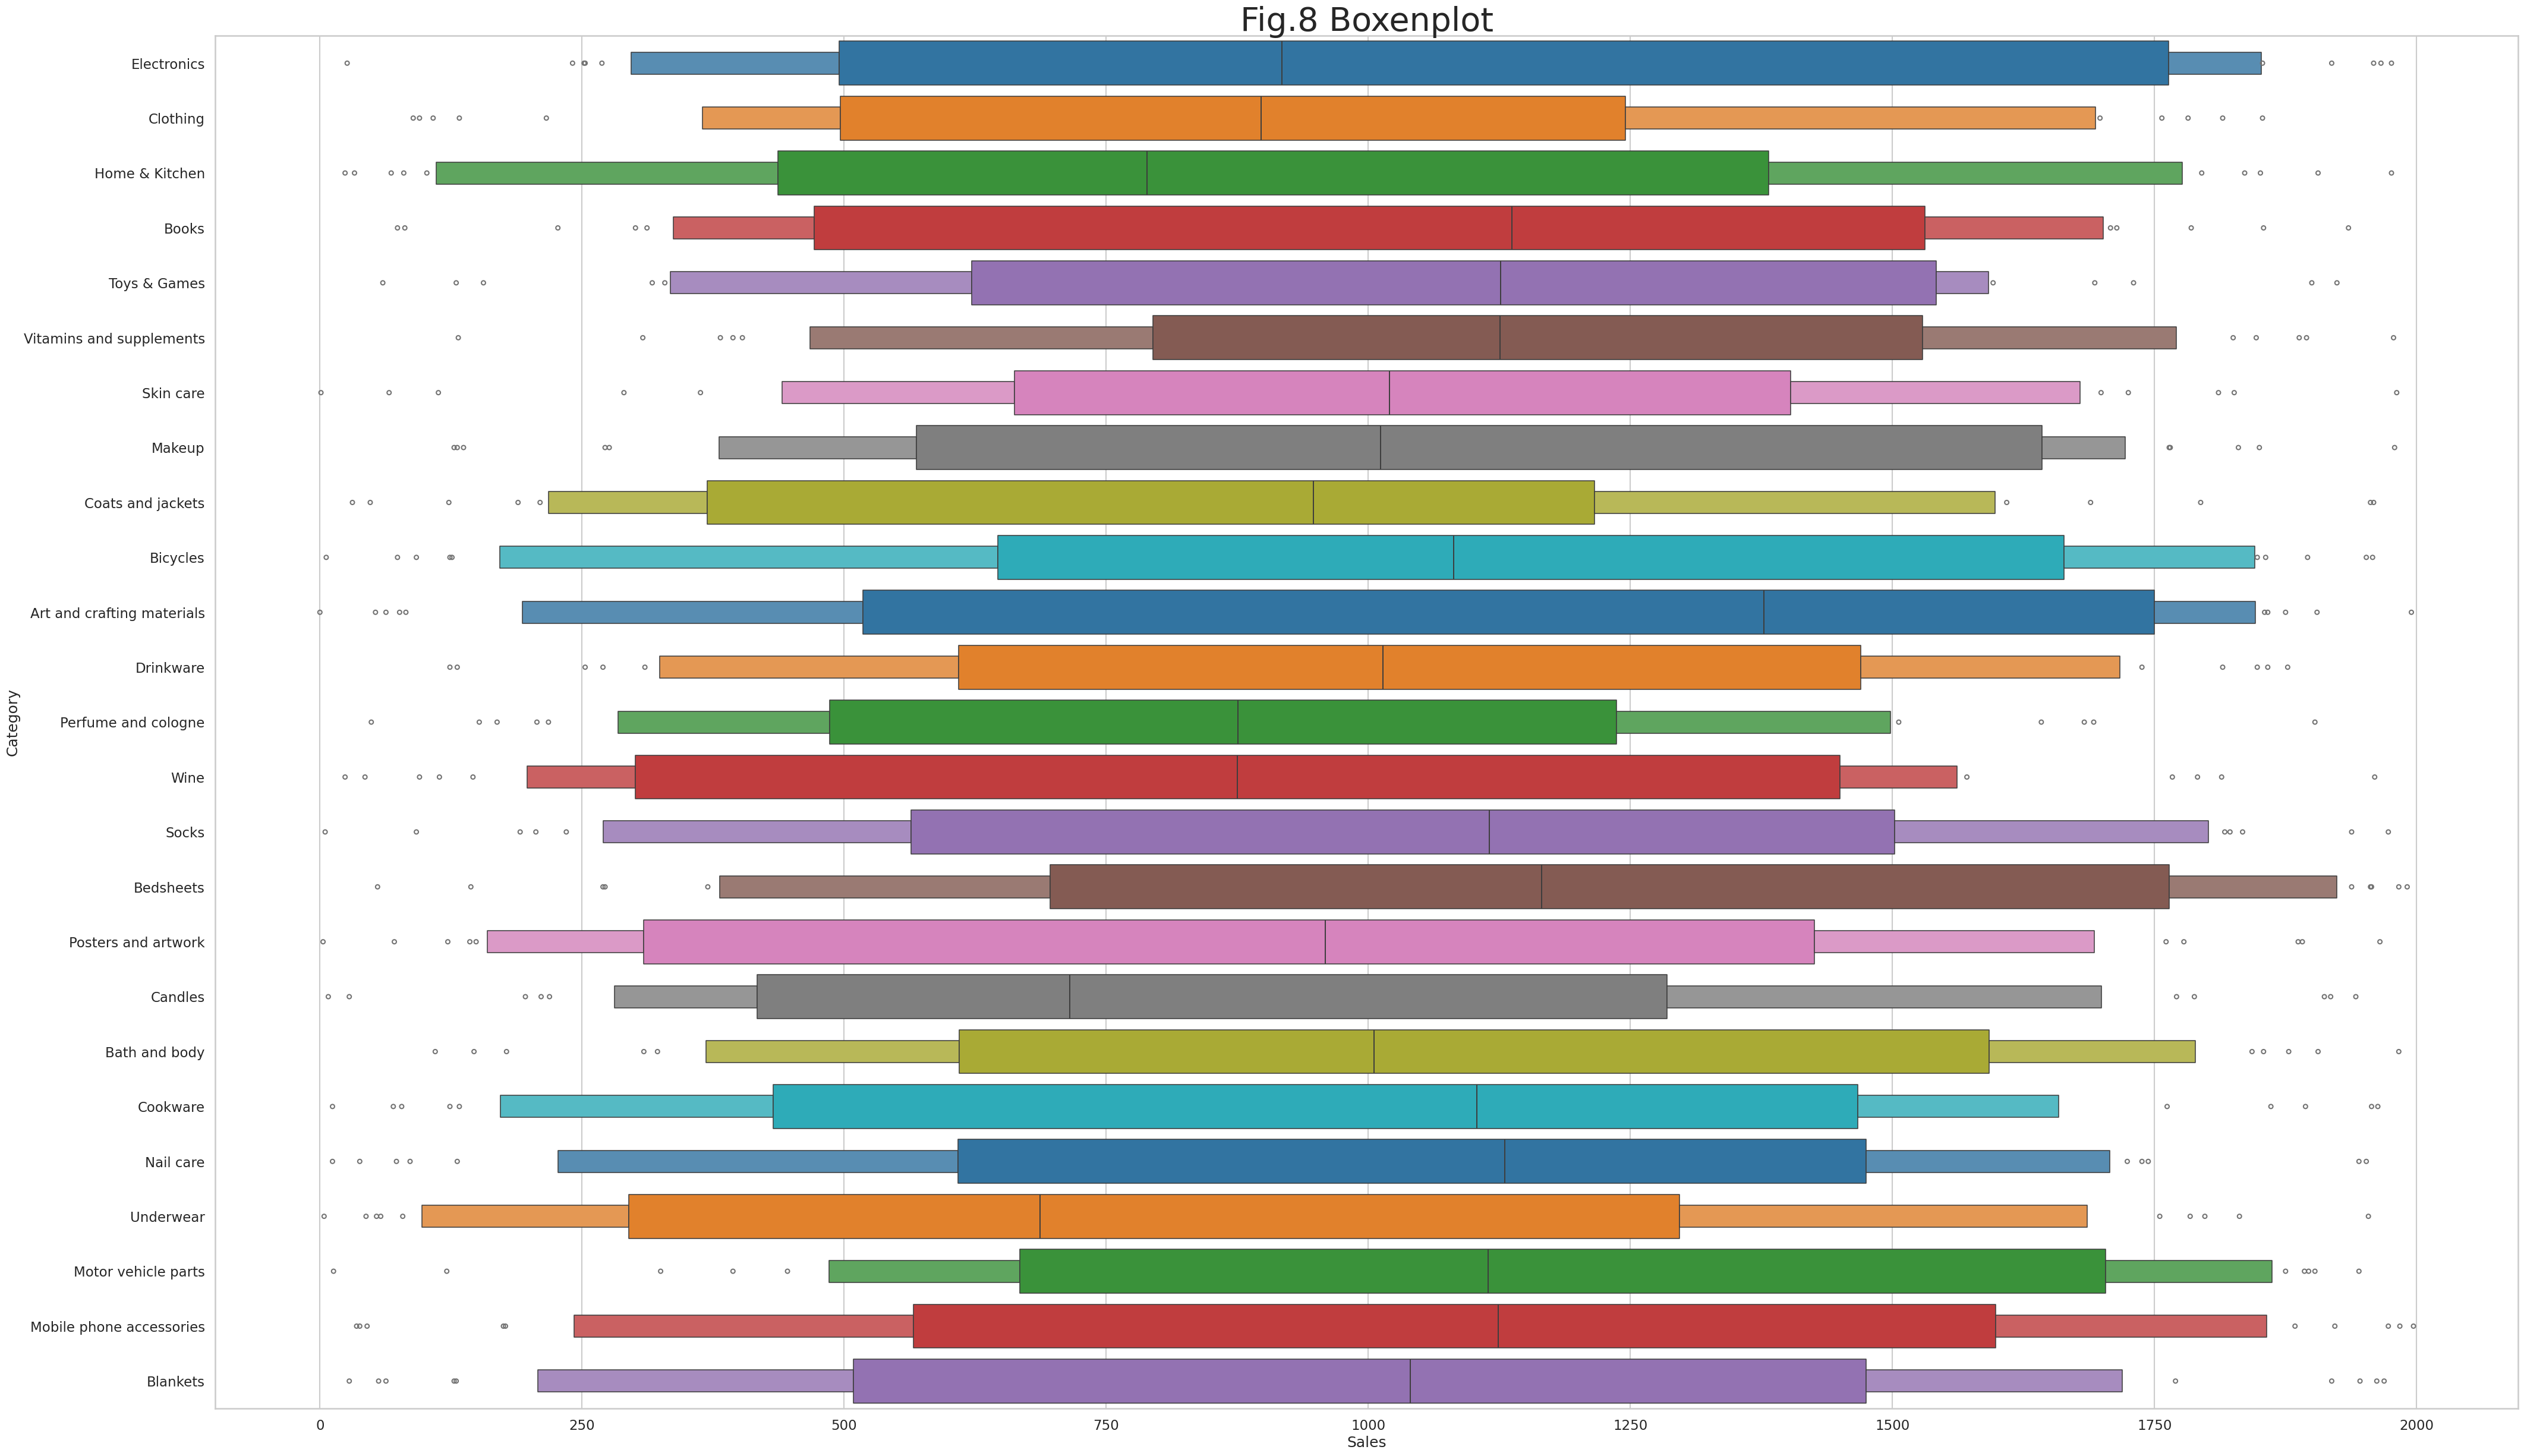

In [36]:
plt.figure(figsize=(50,30))
sns.boxenplot(data=df,x='Sales',y='Category',palette='tab10')
plt.title('Fig.8 Boxenplot', fontdict={'fontsize':40})

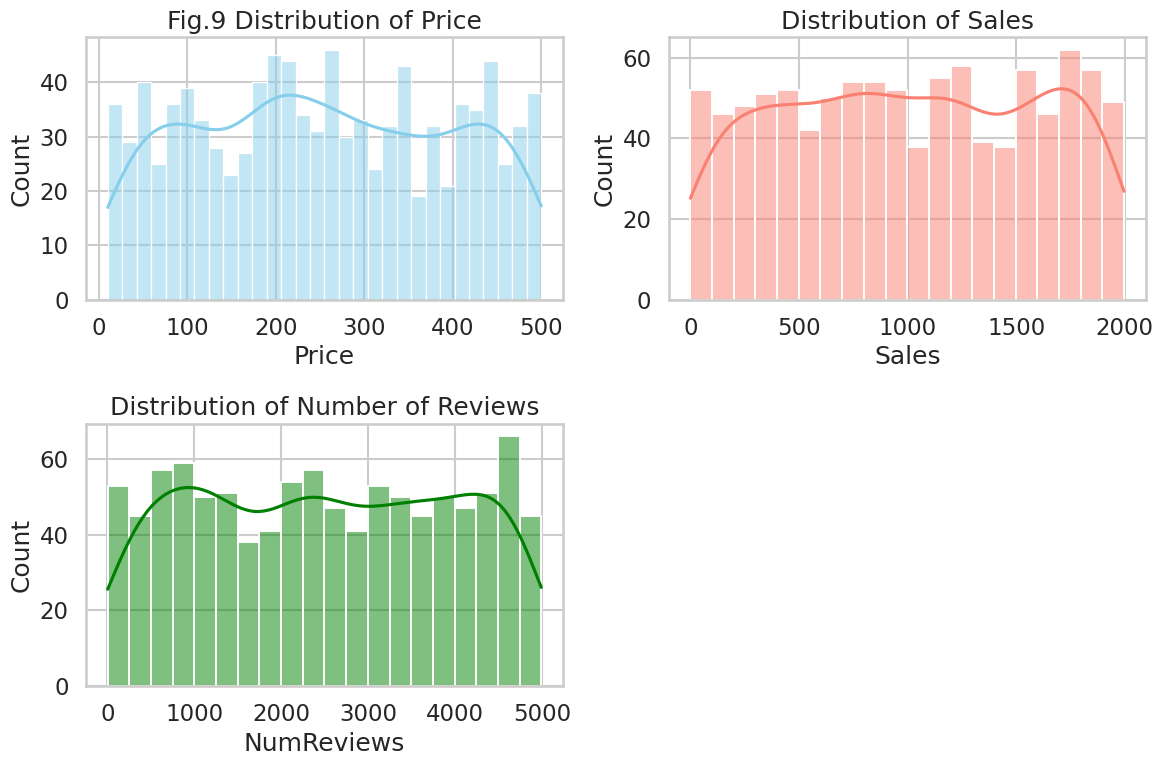

In [22]:
with pd.option_context('mode.use_inf_as_na', False):
    plt.figure(figsize=(12,8))
    plt.subplot(2,2,1)
    sns.histplot(df['Price'],bins=30,kde=True,color='skyblue')
    plt.title('Fig.9 Distribution of Price')

    plt.subplot(2,2,2)
    sns.histplot(df['Sales'],bins=20,kde=True,color='salmon')
    plt.title('Distribution of Sales')

    plt.subplot(2,2,3)
    sns.histplot(df['NumReviews'],bins=20,kde=True,color='green')
    plt.title('Distribution of Number of Reviews')



    plt.tight_layout()
    plt.show()

<Axes: xlabel='Category', ylabel='Price'>

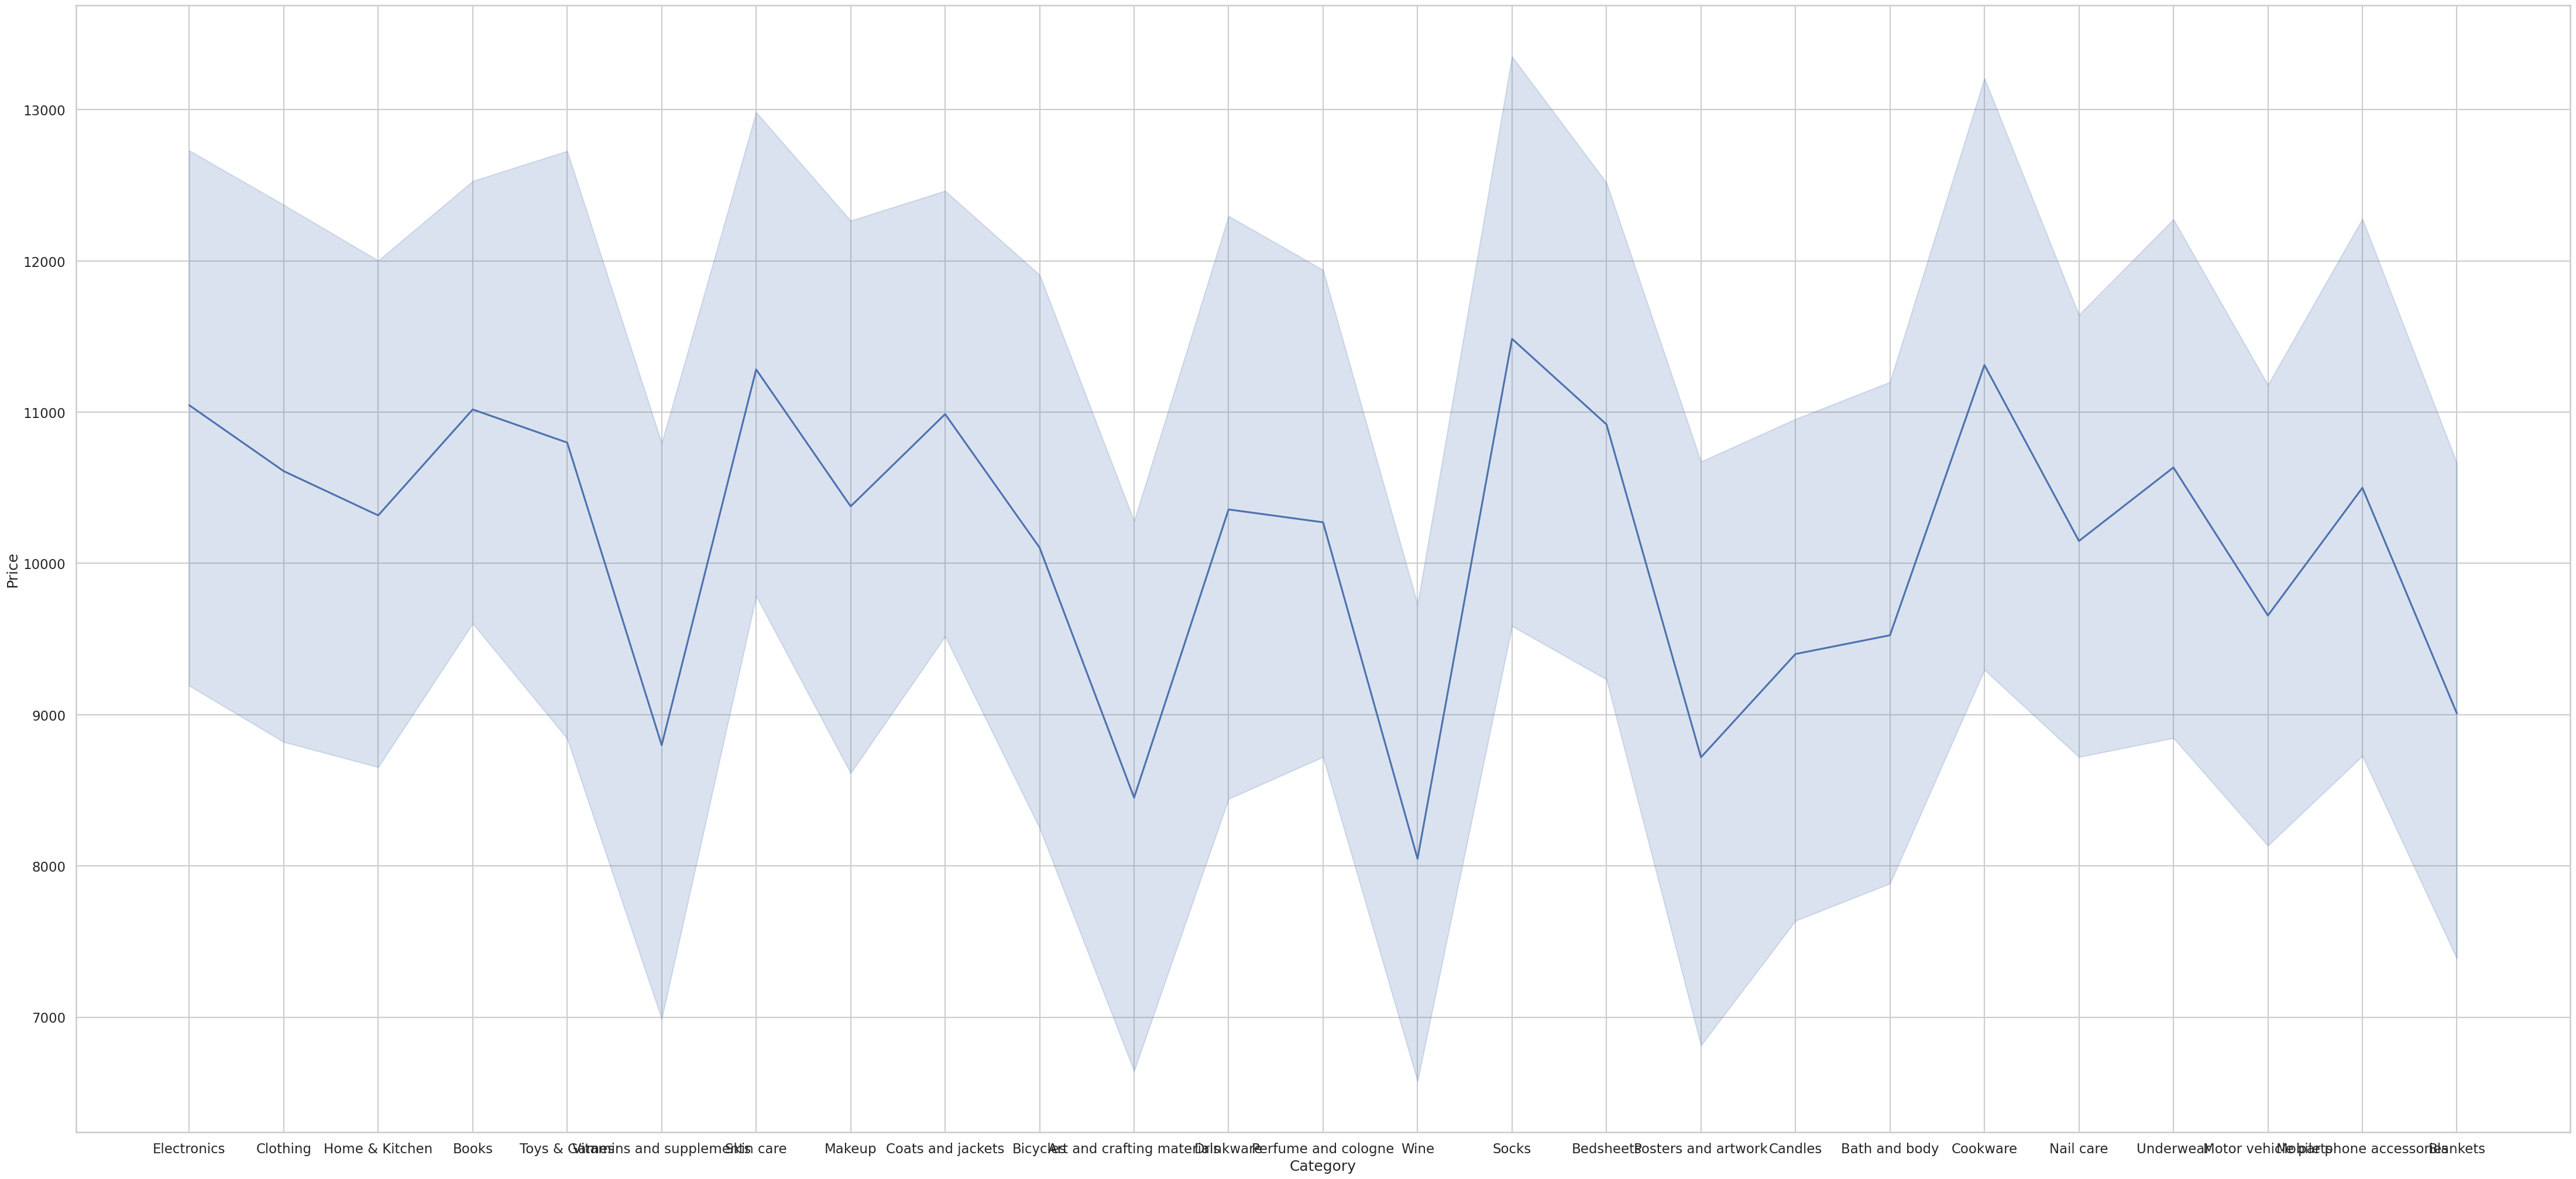

In [32]:
plt.figure(figsize=(55,25))
sns.lineplot(data=df,x='Category',y='Price', estimator=np.sum)

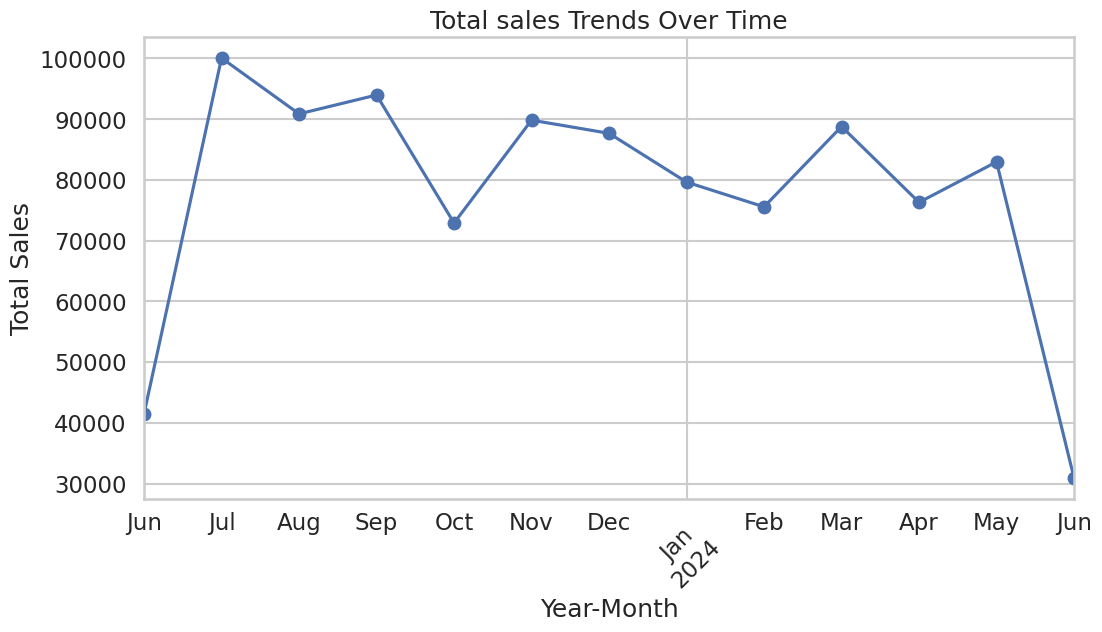

In [25]:
df['DateAdded'] = pd.to_datetime(df['DateAdded'])
df['YearMonth'] = df['DateAdded'].dt.to_period('M')
sales_trends=df.groupby('YearMonth')['Sales'].sum()
plt.figure(figsize=(12,6))
sales_trends.plot(marker='o')
plt.title('Total sales Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()